In [1]:
%matplotlib inline


# Mean filters


This example compares the following mean filters of the rank filter package:

* **local mean**: all pixels belonging to the structuring element to compute
  average gray level.
* **percentile mean**: only use values between percentiles p0 and p1
  (here 10% and 90%).
* **bilateral mean**: only use pixels of the structuring element having a gray
  level situated inside g-s0 and g+s1 (here g-500 and g+500)

Percentile and usual mean give here similar results, these filters smooth the
complete image (background and details). Bilateral mean exhibits a high
filtering rate for continuous area (i.e. background) while higher image
frequencies remain untouched.



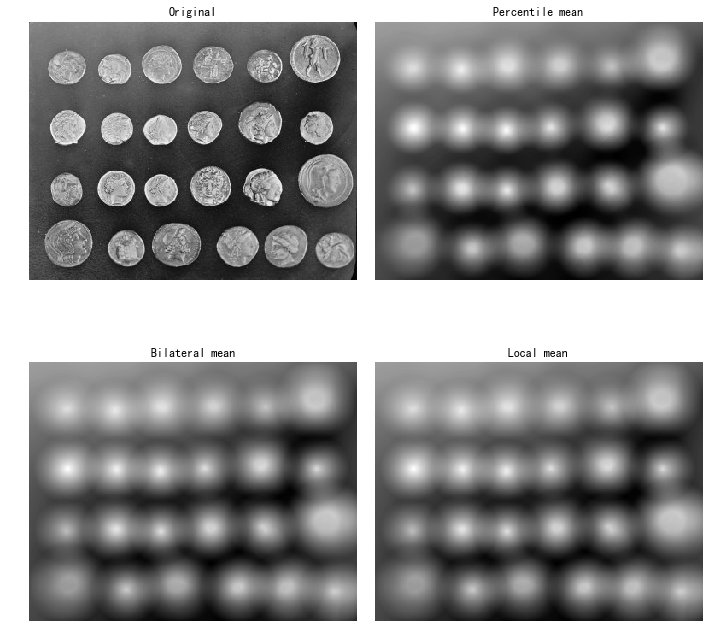

In [2]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.morphology import disk
from skimage.filters import rank


image = data.coins()
selem = disk(20)

percentile_result = rank.mean_percentile(image, selem=selem, p0=.1, p1=.9)
bilateral_result = rank.mean_bilateral(image, selem=selem, s0=500, s1=500)
normal_result = rank.mean(image, selem=selem)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

titles = ['Original', 'Percentile mean', 'Bilateral mean', 'Local mean']
imgs = [image, percentile_result, bilateral_result, normal_result]
for n in range(0, len(imgs)):
    ax[n].imshow(imgs[n], cmap=plt.cm.gray)
    ax[n].set_title(titles[n])
    ax[n].axis('off')

plt.tight_layout()
plt.show()